# Avocado prediction

Problem description: 

Our client, Avocado King, is an avocado supplier that sells conventional and organic avocados all over the U.S. The client has given you historical data on the avocado prices/sales in the US market and they want to know how they could use this data and predictive models to gain a competitive edge. They are particularly interested in predicting the prices of avocados and the number of avocados sold.

# Modeling and preprocessing

## General pre processing
1. Convert date to numeric
2. Replace NaN 
## Total Volume prediction
1. Remove redundant features* 
2. Split data for forecast
3. Training
## Average price prediction
1. Remove redundant features* 
2. Split data for forecast
3. Training
## Average price prediction with google search data
1. Merge dataframes
2. Remove redundant columns* 
3. Split data for forecast
4. Training


Importing libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [316]:
df = pd.read_csv('price-and-sales-data.csv')

In [317]:
df.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


## 1. Convert to week and year for both datasets

In [318]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.week

In [319]:
df.rename(columns={'Date': 'Week','4046': 'Type1','4225': 'Type2','4770': 'Type3'}, inplace=True)

In [320]:
df.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [321]:
df['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [322]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

## 2. Replace NaN

In [323]:
df.loc[df.AveragePrice.isnull(), 'AveragePrice'] = df.groupby('region').AveragePrice.transform('mean')
df.loc[df.TotalVolume.isnull(), 'TotalVolume']   = df.groupby('region').TotalVolume.transform('mean')
df.loc[df.Type1.isnull(), 'Type1']               = df.groupby('region').Type1.transform('mean')
df.loc[df.Type2.isnull(), 'Type2']               = df.groupby('region').Type2.transform('mean')
df.loc[df.Type3.isnull(), 'Type3']               = df.groupby('region').Type3.transform('mean')
df.loc[df.TotalBags.isnull(), 'TotalBags']       = df.groupby('region').TotalBags.transform('mean')
df.loc[df.SmallBags.isnull(), 'SmallBags']       = df.groupby('region').SmallBags.transform('mean')
df.loc[df.LargeBags.isnull(), 'LargeBags']       = df.groupby('region').LargeBags.transform('mean')
df.loc[df.XLargeBags.isnull(), 'XLargeBags']     = df.groupby('region').XLargeBags.transform('mean')

In [324]:
df.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


# Total volume prediction

## 3. Remove reduntant columns

In [386]:
# keep all features here, and remove later after split and merge
df1_tot = df.copy()

## 4. Split data for forecast

In [387]:
df1_tot_2015 = df1_tot[df1_tot['year']==2015]
df1_tot_2016 = df1_tot[df1_tot['year']==2016]
df1_tot_2017 = df1_tot[df1_tot['year']==2017]
df1_tot_2018 = df1_tot[df1_tot['year']==2018]
df1_tot_2019 = df1_tot[df1_tot['year']==2019]

In [388]:
# generate 2015, 2016 to predict 2017  
tmp = pd.merge(df1_tot_2016, df1_tot_2015, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat1 = pd.merge(df1_tot_2017, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat1.dropna(inplace=True)

In [389]:
# drop features in 2018 that are unknown: average price 
dat1.drop(dat1.columns[[1,3,4,5,6,7,8,9]],axis=1,inplace=True)
dat1.head()

,Week,TotalVolume,type,year,region,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
108,1,91728.18,conventional,2017,Albany,1.28,79121.770000,848.19,66696.97,109.08,...,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015.0
109,1,601546.19,conventional,2017,Atlanta,0.93,558348.800000,377244.81,67316.04,464.46,...,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015.0
110,1,1029279.83,conventional,2017,BaltimoreWashington,1.17,427507.700067,60261.38,511067.00,26791.33,...,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015.0
111,1,103788.25,conventional,2017,Boise,0.93,89880.900000,31802.36,8347.01,9065.03,...,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,2015.0
112,1,730358.49,conventional,2017,Boston,1.15,536674.530000,4120.09,391873.45,13321.08,...,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,2015.0


In [390]:
# generate 2016, 2017 to predict 2018
tmp = pd.merge(df1_tot_2017, df1_tot_2016, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat2 = pd.merge(df1_tot_2018, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat2.dropna(inplace=True)

In [391]:
# drop features in 2018 that are unknown: average price 
dat2.drop(dat2.columns[[1,3,4,5,6,7,8,9]],axis=1,inplace=True)
dat2.head()

,Week,TotalVolume,type,year,region,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
0,1,98540.22,conventional,2018,Albany,1.550000,91728.18,3355.47,75641.23,56.91,...,1.28,79121.770000,848.19,66696.97,109.08,11467.53,6829.020607,173.88,0.00,2016.0
1,1,713915.80,conventional,2018,Atlanta,0.980000,601546.19,279265.77,77758.24,319.36,...,0.93,558348.800000,377244.81,67316.04,464.46,113323.49,54693.050000,58630.44,0.00,2016.0
2,1,771313.78,conventional,2018,BaltimoreWashington,1.500987,1029279.83,83249.92,750033.84,9793.59,...,1.17,427507.700067,60261.38,511067.00,26791.33,182859.42,180460.980000,2398.44,0.00,2016.0
3,1,85697.65,conventional,2018,Boise,1.020000,103788.25,35596.88,7162.53,12143.68,...,0.93,89880.900000,31802.36,8347.01,9065.03,40666.50,40584.430000,16.94,65.13,2016.0
4,1,685417.51,conventional,2018,Boston,1.090000,730358.49,7543.51,605624.94,9300.68,...,1.15,536674.530000,4120.09,391873.45,13321.08,127359.91,127177.650000,182.26,0.00,2016.0


In [392]:
# merge the final data row wise for training
dat = pd.concat([dat1,dat2], axis=0)

In [393]:
dat.head()

,Week,TotalVolume,type,year,region,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
108,1,91728.18,conventional,2017,Albany,1.28,79121.770000,848.19,66696.97,109.08,...,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015.0
109,1,601546.19,conventional,2017,Atlanta,0.93,558348.800000,377244.81,67316.04,464.46,...,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015.0
110,1,1029279.83,conventional,2017,BaltimoreWashington,1.17,427507.700067,60261.38,511067.00,26791.33,...,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015.0
111,1,103788.25,conventional,2017,Boise,0.93,89880.900000,31802.36,8347.01,9065.03,...,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,2015.0
112,1,730358.49,conventional,2017,Boston,1.15,536674.530000,4120.09,391873.45,13321.08,...,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,2015.0


In [394]:
# generate 2017, 2018 to predict 2019 (test set)
tmp = pd.merge(df1_tot_2018, df1_tot_2017, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat3 = pd.merge(df1_tot_2019, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat3.dropna(inplace=True)

In [395]:
# drop features in 2018 that are not known: average price 
dat3.drop(dat3.columns[[1,3,4,5,6,7,8,9]],axis=1,inplace=True)
dat3.head()

,Week,TotalVolume,type,year,region,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
0,2,44749707.48,conventional,2019,TotalUS,1.20,37299945.22,1.260092e+07,11866197.84,652808.40,...,0.98,38295488.31,12936858.36,12625665.39,579346.52,12153618.04,9445622.04,2638918.48,69077.52,2017.0
1,2,129222.29,conventional,2019,Albany,1.42,95246.38,2.897410e+03,76570.67,44.00,...,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,2017.0
2,2,828971.15,conventional,2019,Atlanta,1.10,670766.04,1.504963e+05,60229.21,1604.90,...,0.99,557377.82,249159.52,86964.23,169.63,221084.44,145333.47,75750.97,0.00,2017.0
3,2,925391.38,conventional,2019,BaltimoreWashington,1.49,799726.89,9.178560e+04,485963.15,4234.82,...,1.48,749510.72,76382.33,472453.49,10119.64,190555.26,188395.17,2152.31,7.78,2017.0
4,2,108261.98,conventional,2019,Boise,1.15,111113.11,4.933523e+04,7414.97,8298.95,...,1.00,94156.43,36085.47,4773.66,10056.51,43240.79,38975.02,4039.78,225.99,2017.0


In [396]:
data_train = dat.copy()
data_test  = dat3.copy()

# label encoding (not one hot encoding)
le = preprocessing.LabelEncoder()
data_train['type'] = le.fit_transform(data_train['type'])
data_test['type'] = le.fit_transform(data_test['type'])

In [397]:
# one hot encoding
data_train = pd.get_dummies(data_train, columns = ['region'], drop_first=False)
data_test = pd.get_dummies(data_test, columns = ['region'], drop_first=False)

In [398]:
data_train.head()

,Week,TotalVolume,type,year,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,TotalBags_x,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
108,1,91728.18,0,2017,1.28,79121.770000,848.19,66696.97,109.08,11467.53,...,0,0,0,0,0,0,0,0,0,0
109,1,601546.19,0,2017,0.93,558348.800000,377244.81,67316.04,464.46,113323.49,...,0,0,0,0,0,0,0,0,0,0
110,1,1029279.83,0,2017,1.17,427507.700067,60261.38,511067.00,26791.33,182859.42,...,0,0,0,0,0,0,0,0,0,0
111,1,103788.25,0,2017,0.93,89880.900000,31802.36,8347.01,9065.03,40666.50,...,0,0,0,0,0,0,0,0,0,0
112,1,730358.49,0,2017,1.15,536674.530000,4120.09,391873.45,13321.08,127359.91,...,0,0,0,0,0,0,0,0,0,0


In [399]:
data_test.head()

,Week,TotalVolume,type,year,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,TotalBags_x,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2,44749707.48,0,2019,1.20,37299945.22,1.260092e+07,11866197.84,652808.40,12180020.74,...,0,0,0,0,0,0,0,1,0,0
1,2,129222.29,0,2019,1.42,95246.38,2.897410e+03,76570.67,44.00,15734.30,...,0,0,0,0,0,0,0,0,0,0
2,2,828971.15,0,2019,1.10,670766.04,1.504963e+05,60229.21,1604.90,309955.96,...,0,0,0,0,0,0,0,0,0,0
3,2,925391.38,0,2019,1.49,799726.89,9.178560e+04,485963.15,4234.82,217743.32,...,0,0,0,0,0,0,0,0,0,0
4,2,108261.98,0,2019,1.15,111113.11,4.933523e+04,7414.97,8298.95,46063.96,...,0,0,0,0,0,0,0,0,0,0


## 5. Training

In [402]:
# test with regions and without
#X_train = data_train.iloc[:,[0] + [x for x in range(2,len(data_train.columns))]] 
X_train = data_train.iloc[:,[0] + [x for x in range(2,24)]] 
y_train = data_train.iloc[:,1]

#X_test = data_test.iloc[:,[0] + [x for x in range(2,len(data_test.columns))]] 
X_test = data_test.iloc[:,[0] + [x for x in range(2,24)]] 
y_test = data_test.iloc[:,1]

In [403]:
X_train.head()

,Week,type,year,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,TotalBags_x,SmallBags_x,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
108,1,0,2017,1.28,79121.770000,848.19,66696.97,109.08,11467.53,6829.020607,...,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015.0
109,1,0,2017,0.93,558348.800000,377244.81,67316.04,464.46,113323.49,54693.050000,...,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015.0
110,1,0,2017,1.17,427507.700067,60261.38,511067.00,26791.33,182859.42,180460.980000,...,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015.0
111,1,0,2017,0.93,89880.900000,31802.36,8347.01,9065.03,40666.50,40584.430000,...,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,2015.0
112,1,0,2017,1.15,536674.530000,4120.09,391873.45,13321.08,127359.91,127177.650000,...,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,2015.0


In [404]:
X_train.shape

(10687, 23)

In [405]:
X_test.head()

,Week,type,year,AveragePrice_x,TotalVolume_x,Type1_x,Type2_x,Type3_x,TotalBags_x,SmallBags_x,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
0,2,0,2019,1.20,37299945.22,1.260092e+07,11866197.84,652808.40,12180020.74,8.128242e+06,...,0.98,38295488.31,12936858.36,12625665.39,579346.52,12153618.04,9445622.04,2638918.48,69077.52,2017.0
1,2,0,2019,1.42,95246.38,2.897410e+03,76570.67,44.00,15734.30,6.829021e+03,...,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,2017.0
2,2,0,2019,1.10,670766.04,1.504963e+05,60229.21,1604.90,309955.96,1.715085e+05,...,0.99,557377.82,249159.52,86964.23,169.63,221084.44,145333.47,75750.97,0.00,2017.0
3,2,0,2019,1.49,799726.89,9.178560e+04,485963.15,4234.82,217743.32,2.129570e+05,...,1.48,749510.72,76382.33,472453.49,10119.64,190555.26,188395.17,2152.31,7.78,2017.0
4,2,0,2019,1.15,111113.11,4.933523e+04,7414.97,8298.95,46063.96,1.913596e+04,...,1.00,94156.43,36085.47,4773.66,10056.51,43240.79,38975.02,4039.78,225.99,2017.0


In [406]:
X_test.shape

(3022, 23)

In [407]:
y_train.head()

108      91728.18
109     601546.19
110    1029279.83
111     103788.25
112     730358.49
Name: TotalVolume, dtype: float64

In [408]:
ex_model = ExtraTreesRegressor()

In [409]:
ex_model.fit(X_train,y_train)

ExtraTreesRegressor()

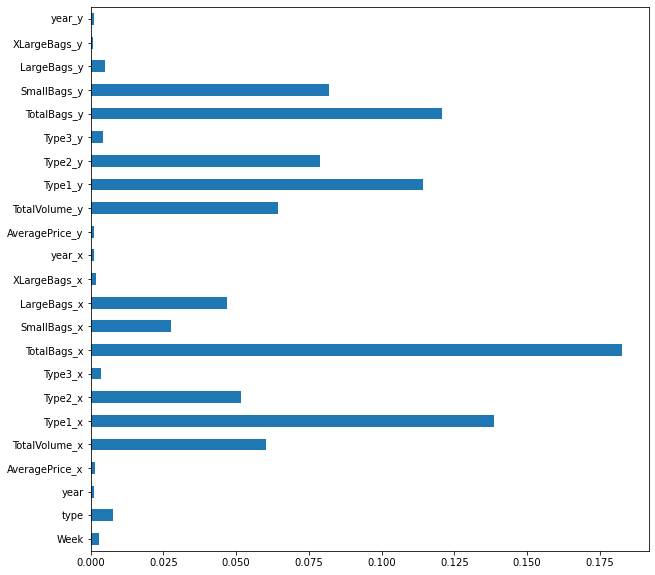

In [410]:
plt.figure(figsize=(10,10))
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

In [411]:
n_estimators = [int(x) for x in np.linspace(start=40,stop=100,num=15)] # The number of trees in the forest
max_features = ['sqrt','log2'] # 'auto','sqrt','log2' The number of features to consider when looking for the best split
max_depth    = [int(x) for x in np.linspace(start=5,stop=15,num=5)]
min_smp_splt = sorted(np.random.randint(200,1200,10))
min_smp_leaf = sorted(np.random.randint(40,70,10))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [40, 44, 48, 52, 57, 61, 65, 70, 74, 78, 82, 87, 91, 95, 100], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 10, 12, 15], 'min_samples_split': [299, 309, 387, 461, 513, 713, 782, 822, 938, 1122], 'min_samples_leaf': [42, 42, 44, 47, 53, 55, 56, 58, 59, 63]}


In [412]:
model = GradientBoostingRegressor(learning_rate=0.05,subsample=0.85)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=25,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=1
)

In [413]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                       subsample=0.85),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 10, 12, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [42, 42, 44, 47, 53,
                                                             55, 56, 58, 59,
                                                             63],
                                        'min_samples_split': [299, 309, 387,
                                                              461, 513, 713,
                                                              782, 822, 938,
                                                              1122],
                                        'n_estimators': [40, 44, 48, 52, 57, 61,
                                   

In [414]:
pred = model_random.predict(X_test)

(-10000000.0, 10000000.0)

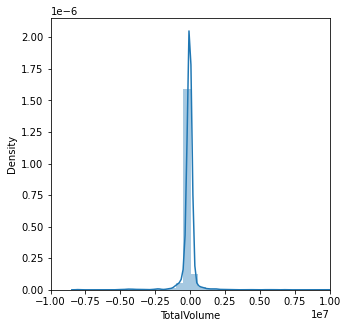

In [415]:
plt.figure(figsize=(5,5))
sns.distplot(y_test - pred)
plt.xlim(-1e7, 1e7)

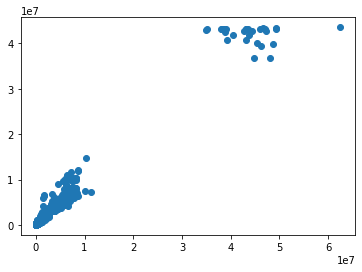

In [416]:
plt.scatter(y_test,pred)

In [417]:
r2_score(y_test,pred)

0.9716628352245151

# Average price prediction

## 6. Remove redundant features

In [419]:
df1_avg = df.copy()
# keep all features, i.e., assume we have total volume from prediction. Although  
# the Total volume feature should be the predicted TotalVolume. The Type1, Type2, Type3, Totalbags... features 
# are just features set by the user after Total volume prediction, so these are also kept (known values).

In [420]:
df1_avg.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


## 7. Split data for forecast

In [421]:
# split the data into individual years
df1_avg_2015 = df1_avg[df1_avg['year']==2015]
df1_avg_2016 = df1_avg[df1_avg['year']==2016]
df1_avg_2017 = df1_avg[df1_avg['year']==2017]
df1_avg_2018 = df1_avg[df1_avg['year']==2018]
df1_avg_2019 = df1_avg[df1_avg['year']==2019]

In [422]:
# generate 2015, 2016 to predict 2017 (merge on sharing features) 
tmp = pd.merge(df1_avg_2016, df1_avg_2015, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat1 = pd.merge(df1_avg_2017, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat1.dropna(inplace=True)

In [423]:
dat1.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
108,1,1.550000,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,...,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015.0
109,1,0.980000,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,...,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015.0
110,1,1.500987,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,...,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015.0
111,1,1.020000,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,...,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,2015.0
112,1,1.090000,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,...,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,2015.0


In [424]:
# generate 2016, 2017 to predict 2018 (merge on sharing features) 
tmp = pd.merge(df1_avg_2017, df1_avg_2016, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat2 = pd.merge(df1_avg_2018, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat2.dropna(inplace=True)

In [428]:
# keep all features (assume we have total volume and all other volumes from prediction)
dat2.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
0,1,1.13,98540.22,2940.63000,76192.610000,42.63,19364.35,8633.09,10707.930000,23.33,...,1.28,79121.770000,848.19,66696.97,109.08,11467.53,6829.020607,173.88,0.00,2016.0
1,1,0.98,713915.80,364463.12000,47869.410000,1459.65,300123.62,217644.43,37400.335089,4191.53,...,0.93,558348.800000,377244.81,67316.04,464.46,113323.49,54693.050000,58630.44,0.00,2016.0
2,1,1.50,771313.78,40559.39323,251781.156414,4167.07,210660.85,189304.53,21356.320000,0.00,...,1.17,427507.700067,60261.38,511067.00,26791.33,182859.42,180460.980000,2398.44,0.00,2016.0
3,1,1.30,85697.65,45936.53000,2658.280000,7511.15,29591.69,21784.14,7752.830000,54.72,...,0.93,89880.900000,31802.36,8347.01,9065.03,40666.50,40584.430000,16.94,65.13,2016.0
4,1,1.28,685417.51,12012.96000,557314.830000,4961.24,111128.48,58834.32,8098.716764,0.00,...,1.15,536674.530000,4120.09,391873.45,13321.08,127359.91,127177.650000,182.26,0.00,2016.0


In [429]:
# merge the final data row wise for training
dat = pd.concat([dat1,dat2], axis=0)

In [430]:
dat.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
108,1,1.550000,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,...,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015.0
109,1,0.980000,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,...,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015.0
110,1,1.500987,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,...,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015.0
111,1,1.020000,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,...,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,2015.0
112,1,1.090000,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,...,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,2015.0


In [431]:
# generate 2017, 2018 to predict 2019 (test set)
tmp = pd.merge(df1_avg_2018, df1_avg_2017, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat3 = pd.merge(df1_avg_2019, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat3.dropna(inplace=True)

In [432]:
# keep all features (assume we have total volume from prediction)
dat3.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,AveragePrice_y,TotalVolume_y,Type1_y,Type2_y,Type3_y,TotalBags_y,SmallBags_y,LargeBags_y,XLargeBags_y,year_y
0,2,1.02,44749707.48,14377053.08,11890232.90,893721.10,17588700.40,12829493.40,4617813.55,141393.45,...,0.98,38295488.31,12936858.36,12625665.39,579346.52,12153618.04,9445622.04,2638918.48,69077.52,2017.0
1,2,1.07,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00,...,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,2017.0
2,2,0.92,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,58.61,...,0.99,557377.82,249159.52,86964.23,169.63,221084.44,145333.47,75750.97,0.00,2017.0
3,2,1.31,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,13.33,...,1.48,749510.72,76382.33,472453.49,10119.64,190555.26,188395.17,2152.31,7.78,2017.0
4,2,1.23,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,34.98,...,1.00,94156.43,36085.47,4773.66,10056.51,43240.79,38975.02,4039.78,225.99,2017.0


In [433]:
data_train = dat.copy()
data_test  = dat3.copy()

# label encoding (not one hot encoding)
le = preprocessing.LabelEncoder()
data_train['type'] = le.fit_transform(data_train['type'])
data_test['type'] = le.fit_transform(data_test['type'])

In [434]:
#data_train.head()
data_train['type'].unique()

array([0, 1])

In [435]:
# one hot encoding
data_train = pd.get_dummies(data_train, columns = ['region'], drop_first=False)
data_test = pd.get_dummies(data_test, columns = ['region'], drop_first=False)

In [436]:
data_train.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
108,1,1.550000,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,...,0,0,0,0,0,0,0,0,0,0
109,1,0.980000,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,...,0,0,0,0,0,0,0,0,0,0
110,1,1.500987,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,...,0,0,0,0,0,0,0,0,0,0
111,1,1.020000,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,...,0,0,0,0,0,0,0,0,0,0
112,1,1.090000,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,...,0,0,0,0,0,0,0,0,0,0


## 8. Training 

In [437]:
# test with regions and without
X_train = data_train.iloc[:,[0] + [x for x in range(2,len(data_train.columns))]] 
#X_train = data_train.iloc[:,[0] + [x for x in range(2,32)]] 
y_train = data_train.iloc[:,1]

X_test = data_test.iloc[:,[0] + [x for x in range(2,len(data_test.columns))]] 
#X_test = data_test.iloc[:,[0] + [x for x in range(2,32)]] 
y_test = data_test.iloc[:,1]

In [438]:
X_train.head()

,Week,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
108,1,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,0,...,0,0,0,0,0,0,0,0,0,0
109,1,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
110,1,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,0,...,0,0,0,0,0,0,0,0,0,0
111,1,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,0,...,0,0,0,0,0,0,0,0,0,0
112,1,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [439]:
X_test.head()

,Week,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2,44749707.48,14377053.08,11890232.90,893721.10,17588700.40,12829493.40,4617813.55,141393.45,0,...,0,0,0,0,0,0,0,1,0,0
1,2,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,2,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,58.61,0,...,0,0,0,0,0,0,0,0,0,0
3,2,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,13.33,0,...,0,0,0,0,0,0,0,0,0,0
4,2,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,34.98,0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
ex_model = ExtraTreesRegressor()

In [ ]:
ex_model.fit(X_train,y_train)

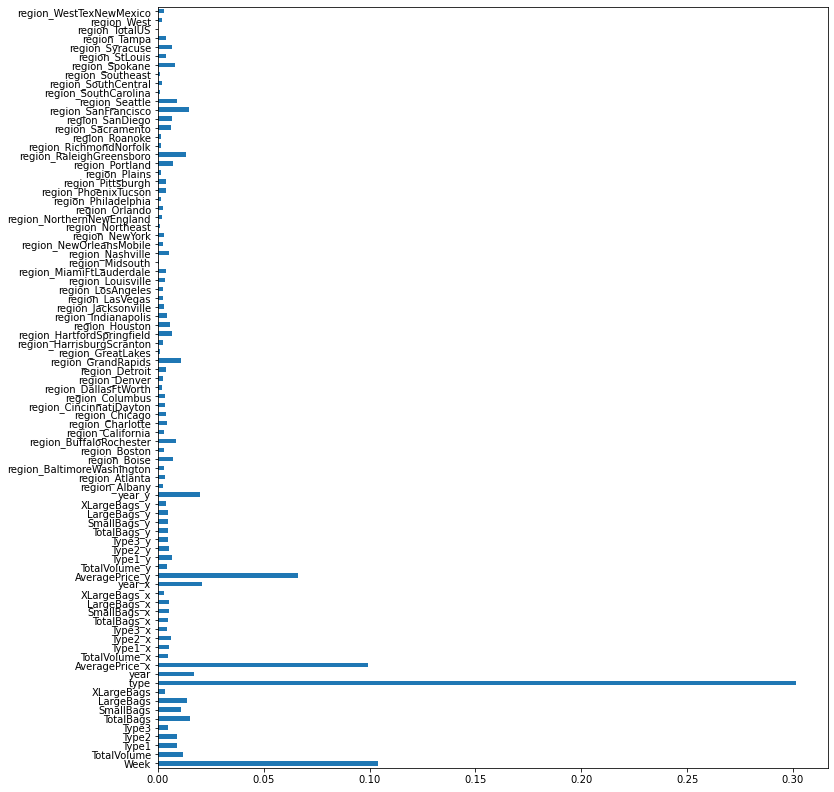

In [297]:
plt.figure(figsize=(12,14))
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

In [312]:
n_estimators = [int(x) for x in np.linspace(start=40,stop=180,num=15)] # The number of trees in the forest
max_features = ['sqrt','log2'] # 'auto','sqrt','log2' The number of features to consider when looking for the best split
max_depth    = [int(x) for x in np.linspace(start=5,stop=15,num=5)]
min_smp_splt = sorted(np.random.randint(200,1200,10))
min_smp_leaf = sorted(np.random.randint(40,70,10))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 10, 12, 15], 'min_samples_split': [425, 438, 483, 657, 716, 902, 1091, 1127, 1174, 1195], 'min_samples_leaf': [41, 43, 48, 48, 52, 53, 56, 64, 65, 66]}


In [313]:
model = GradientBoostingRegressor(learning_rate=0.05,subsample=0.85)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=45,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=1
)

In [314]:
model_random.fit(X_train,y_train).score(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


-0.023752933383472542

In [308]:
pred = model_random.predict(X_test)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

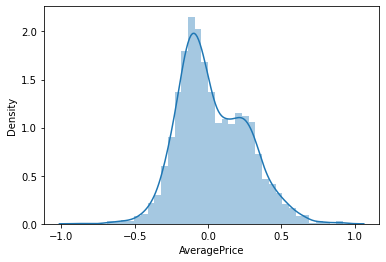

In [309]:
sns.distplot(y_test - pred)

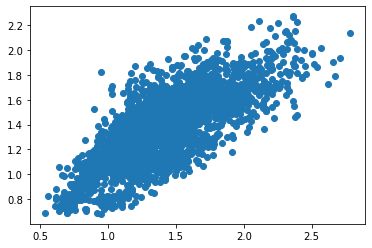

In [310]:
plt.scatter(y_test,pred)

In [311]:
r2_score(y_test,pred)

0.5645261207097406

## Average price prediction with google search data

In [72]:
df1_avg = df.copy()
# drop features that are not known
dat1_avg.drop(dat1_avg.columns[[1,3,4,5,6,7,8,9]],axis=1,inplace=True)
df_go = pd.read_csv('google-data.csv')

In [73]:
df1_avg.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [74]:
df_go.head()

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


In [75]:
df_go.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avocado: (United States),239.0,52.309623,11.291978,29.0,44.5,52.0,60.0,100.0
organic: (United States),239.0,82.497908,6.845764,56.0,79.0,83.0,87.0,100.0
avocado recipe: (United States),239.0,66.991632,14.840890,33.0,55.0,68.0,78.5,100.0
avocado toast: (United States),239.0,32.711297,19.542141,7.0,15.0,30.0,50.5,100.0
avocado sandwich: (United States),239.0,50.179916,12.261723,15.0,42.0,50.0,59.0,100.0
organic avocado: (United States),239.0,36.062762,12.702157,10.0,27.0,35.0,44.5,100.0


In [76]:
df_go.rename(columns={'Week': 'Date'},inplace=True)
df_go.head()

,Date,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


In [77]:
df_go['Date'] = pd.to_datetime(df_go['Date'])
df_go['Week'] = df_go['Date'].dt.week
df_go['year'] = df_go['Date'].dt.year

In [78]:
df_go.head()

,Date,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States),Week,year
0,2015-01-04,46,76,84,8,51,10,1,2015
1,2015-01-11,48,79,76,8,38,29,2,2015
2,2015-01-18,48,82,84,9,66,27,3,2015
3,2015-01-25,49,82,89,8,44,28,4,2015
4,2015-02-01,52,81,82,7,46,42,5,2015


In [79]:
df_go.drop(df_go.columns[[0]],axis=1,inplace=True)

In [80]:
df_go.head()

,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States),Week,year
0,46,76,84,8,51,10,1,2015
1,48,79,76,8,38,29,2,2015
2,48,82,84,9,66,27,3,2015
3,49,82,89,8,44,28,4,2015
4,52,81,82,7,46,42,5,2015


In [81]:
df_avg_go = pd.merge(df1_avg, df_go, how='left', left_on=['Week','year'],right_on=['Week','year'])

In [82]:
df_avg_go.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,46,76,84,8,51,10
1,1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,46,76,84,8,51,10
2,1,1.500987,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington,46,76,84,8,51,10
3,1,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,46,76,84,8,51,10
4,1,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,46,76,84,8,51,10


In [83]:
# split the data into individual years
df1_avg_2015 = df_avg_go[df_avg_go['year']==2015]
df1_avg_2016 = df_avg_go[df_avg_go['year']==2016]
df1_avg_2017 = df_avg_go[df_avg_go['year']==2017]
df1_avg_2018 = df_avg_go[df_avg_go['year']==2018]
df1_avg_2019 = df_avg_go[df_avg_go['year']==2019]

In [84]:
# generate 2015, 2016 to predict 2017 (merge on sharing features) 
tmp = pd.merge(df1_avg_2016, df1_avg_2015, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat1 = pd.merge(df1_avg_2017, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat1.dropna(inplace=True)

In [85]:
# keep all features, i.e., assume we have total volume from prediction even 
# though this feature should be the predicted TotalVolume not the real
#dat1.head()
dat1.columns

Index(['Week', 'AveragePrice', 'TotalVolume', 'Type1', 'Type2', 'Type3',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region', 'avocado: (United States)', 'organic: (United States)',
       'avocado recipe: (United States)', 'avocado toast: (United States)',
       'avocado sandwich: (United States)', 'organic avocado: (United States)',
       'AveragePrice_x', 'TotalVolume_x', 'Type1_x', 'Type2_x', 'Type3_x',
       'TotalBags_x', 'SmallBags_x', 'LargeBags_x', 'XLargeBags_x', 'year_x',
       'avocado: (United States)_x', 'organic: (United States)_x',
       'avocado recipe: (United States)_x', 'avocado toast: (United States)_x',
       'avocado sandwich: (United States)_x',
       'organic avocado: (United States)_x', 'AveragePrice_y', 'TotalVolume_y',
       'Type1_y', 'Type2_y', 'Type3_y', 'TotalBags_y', 'SmallBags_y',
       'LargeBags_y', 'XLargeBags_y', 'year_y', 'avocado: (United States)_y',
       'organic: (United States)_y', 'avocado re

In [86]:
# generate 2016, 2017 to predict 2018 (merge on sharing features) 
tmp = pd.merge(df1_avg_2017, df1_avg_2016, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat2 = pd.merge(df1_avg_2018, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat2.dropna(inplace=True)

In [87]:
# keep all features (assume we have total volume from prediction)
dat2.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,SmallBags_y,LargeBags_y,XLargeBags_y,year_y,avocado: (United States)_y,organic: (United States)_y,avocado recipe: (United States)_y,avocado toast: (United States)_y,avocado sandwich: (United States)_y,organic avocado: (United States)_y
0,1,1.13,98540.22,2940.63000,76192.610000,42.63,19364.35,8633.09,10707.930000,23.33,...,6829.020607,173.88,0.00,2016.0,55.0,82.0,82.0,21.0,60.0,27.0
1,1,0.98,713915.80,364463.12000,47869.410000,1459.65,300123.62,217644.43,37400.335089,4191.53,...,54693.050000,58630.44,0.00,2016.0,55.0,82.0,82.0,21.0,60.0,27.0
2,1,1.50,771313.78,40559.39323,251781.156414,4167.07,210660.85,189304.53,21356.320000,0.00,...,180460.980000,2398.44,0.00,2016.0,55.0,82.0,82.0,21.0,60.0,27.0
3,1,1.30,85697.65,45936.53000,2658.280000,7511.15,29591.69,21784.14,7752.830000,54.72,...,40584.430000,16.94,65.13,2016.0,55.0,82.0,82.0,21.0,60.0,27.0
4,1,1.28,685417.51,12012.96000,557314.830000,4961.24,111128.48,58834.32,8098.716764,0.00,...,127177.650000,182.26,0.00,2016.0,55.0,82.0,82.0,21.0,60.0,27.0


In [88]:
# merge the final data row wise for training
dat = pd.concat([dat1,dat2], axis=0)

In [89]:
dat.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,SmallBags_y,LargeBags_y,XLargeBags_y,year_y,avocado: (United States)_y,organic: (United States)_y,avocado recipe: (United States)_y,avocado toast: (United States)_y,avocado sandwich: (United States)_y,organic avocado: (United States)_y
216,1,1.550000,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,...,9186.93,529.53,0.0,2015.0,46.0,76.0,84.0,8.0,51.0,10.0
217,1,0.980000,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,...,16707.15,30108.64,0.0,2015.0,46.0,76.0,84.0,8.0,51.0,10.0
218,1,1.500987,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,...,137146.07,3990.61,0.0,2015.0,46.0,76.0,84.0,8.0,51.0,10.0
219,1,1.020000,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,...,6064.30,1691.32,0.0,2015.0,46.0,76.0,84.0,8.0,51.0,10.0
220,1,1.090000,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,...,87406.84,256.29,0.0,2015.0,46.0,76.0,84.0,8.0,51.0,10.0


In [90]:
# generate 2017, 2018 to predict 2019 (test set)
tmp = pd.merge(df1_avg_2018, df1_avg_2017, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
tmp.dropna(inplace=True)
dat3 = pd.merge(df1_avg_2019, tmp, how='left', left_on=['Week','region','type'],right_on=['Week','region','type'])
dat3.dropna(inplace=True)

In [91]:
# keep all features (assume we have total volume from prediction)
dat3.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,SmallBags_y,LargeBags_y,XLargeBags_y,year_y,avocado: (United States)_y,organic: (United States)_y,avocado recipe: (United States)_y,avocado toast: (United States)_y,avocado sandwich: (United States)_y,organic avocado: (United States)_y
0,2,1.02,44749707.48,14377053.08,11890232.90,893721.10,17588700.40,12829493.40,4617813.55,141393.45,...,9445622.04,2638918.48,69077.52,2017.0,56.0,89.0,67.0,31.0,56.0,27.0
1,2,1.07,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00,...,12574.72,60.09,0.00,2017.0,56.0,89.0,67.0,31.0,56.0,27.0
2,2,0.92,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,58.61,...,145333.47,75750.97,0.00,2017.0,56.0,89.0,67.0,31.0,56.0,27.0
3,2,1.31,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,13.33,...,188395.17,2152.31,7.78,2017.0,56.0,89.0,67.0,31.0,56.0,27.0
4,2,1.23,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,34.98,...,38975.02,4039.78,225.99,2017.0,56.0,89.0,67.0,31.0,56.0,27.0


In [92]:
data_train = dat.copy()
data_test  = dat3.copy()

# label encoding (not one hot encoding)
le = preprocessing.LabelEncoder()
data_train['type'] = le.fit_transform(data_train['type'])
data_test['type'] = le.fit_transform(data_test['type'])

In [93]:
# one hot encoding
data_train = pd.get_dummies(data_train, columns = ['region'], drop_first=False)
data_test = pd.get_dummies(data_test, columns = ['region'], drop_first=False)

In [94]:
data_train.head()

,Week,AveragePrice,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
216,1,1.550000,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,...,0,0,0,0,0,0,0,0,0,0
217,1,0.980000,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,...,0,0,0,0,0,0,0,0,0,0
218,1,1.500987,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,...,0,0,0,0,0,0,0,0,0,0
219,1,1.020000,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,...,0,0,0,0,0,0,0,0,0,0
220,1,1.090000,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# test with regions and without
X_train = data_train.iloc[:,[0] + [x for x in range(2,len(data_train.columns))]] 
#X_train = data_train.iloc[:,[0] + [x for x in range(2,32)]] 
y_train = data_train.iloc[:,1]

X_test = data_test.iloc[:,[0] + [x for x in range(2,len(data_test.columns))]] 
#X_test = data_test.iloc[:,[0] + [x for x in range(2,32)]] 
y_test = data_test.iloc[:,1]

In [96]:
X_train.head()

,Week,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
216,1,91728.18,3355.47,75641.23,56.91,8531.204652,12606.670000,1475.844107,144.513915,0,...,0,0,0,0,0,0,0,0,0,0
217,1,601546.19,279265.77,77758.24,319.36,244202.820000,74462.201188,71691.930000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
218,1,1029279.83,83249.92,750033.84,9793.59,186202.480000,183395.100000,2281.830000,525.550000,0,...,0,0,0,0,0,0,0,0,0,0
219,1,103788.25,35596.88,7162.53,12143.68,48885.160000,40257.370000,8607.030000,20.760000,0,...,0,0,0,0,0,0,0,0,0,0
220,1,730358.49,7543.51,605624.94,9300.68,107889.360000,107796.030000,93.330000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X_test.head()

,Week,TotalVolume,Type1,Type2,Type3,TotalBags,SmallBags,LargeBags,XLargeBags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2,44749707.48,14377053.08,11890232.90,893721.10,17588700.40,12829493.40,4617813.55,141393.45,0,...,0,0,0,0,0,0,0,1,0,0
1,2,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,2,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,58.61,0,...,0,0,0,0,0,0,0,0,0,0
3,2,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,13.33,0,...,0,0,0,0,0,0,0,0,0,0
4,2,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,34.98,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
ex_model = ExtraTreesRegressor()

In [99]:
ex_model.fit(X_train,y_train)

ExtraTreesRegressor()

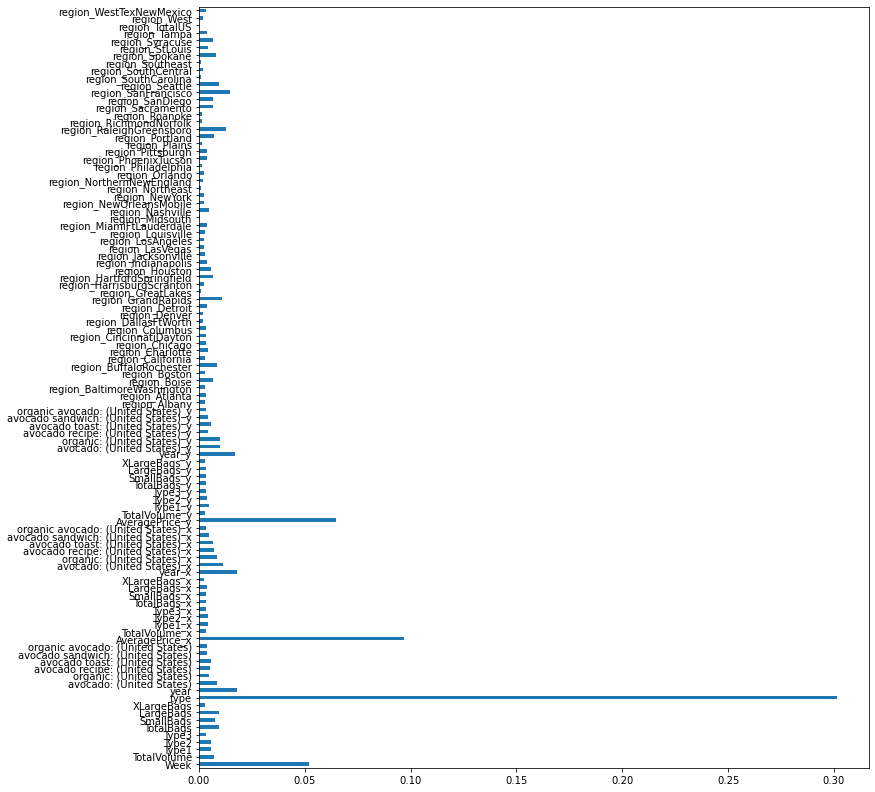

In [100]:
plt.figure(figsize=(12,14))
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

In [198]:
n_estimators = [int(x) for x in np.linspace(start=40,stop=180,num=15)] # The number of trees in the forest
max_features = ['sqrt','log2'] # 'auto','sqrt','log2' The number of features to consider when looking for the best split
max_depth    = [int(x) for x in np.linspace(start=5,stop=15,num=5)]
min_smp_splt = sorted(np.random.randint(200,1200,10))
min_smp_leaf = sorted(np.random.randint(40,70,10))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 10, 12, 15], 'min_samples_split': [221, 286, 405, 406, 584, 860, 924, 1004, 1024, 1173], 'min_samples_leaf': [40, 41, 44, 46, 47, 48, 50, 53, 55, 67]}


In [199]:
model = GradientBoostingRegressor(learning_rate=0.1,subsample=0.85,) # the learning rate scales the trees in the gradient boosted forest
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=45,
                                  n_jobs=4,
                                  cv=5,
                                  verbose=1,
                                  random_state=42
)

In [200]:
model_random.fit(X_train,y_train).score(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


-0.010832272338953078

In [194]:
pred = model_random.predict(X_test)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

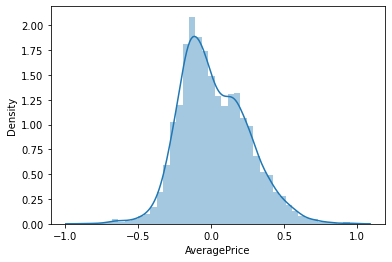

In [195]:
sns.distplot(y_test - pred)

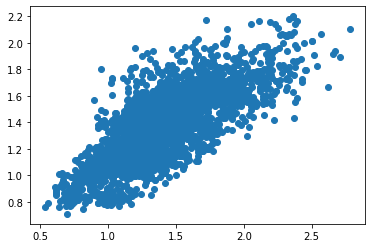

In [196]:
plt.scatter(y_test,pred)

In [197]:
r2_score(y_test,pred)

0.5827898474897419